In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
plt.gray()


<Figure size 640x480 with 0 Axes>

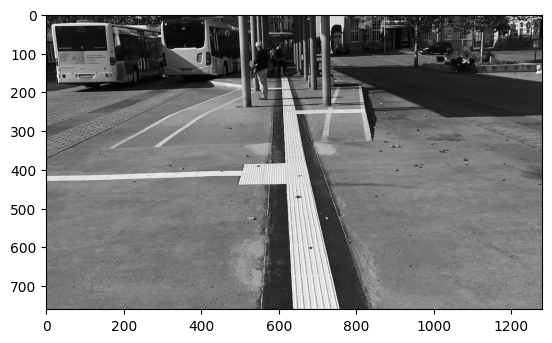

In [2]:
img = cv2.imread("Test_Bilder\streifen_1.png",0)
plt.imshow(img)

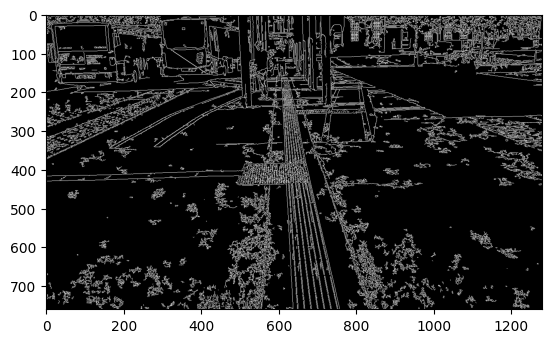

In [3]:
canny = cv2.Canny(img, 20, 300)
plt.imshow(canny)

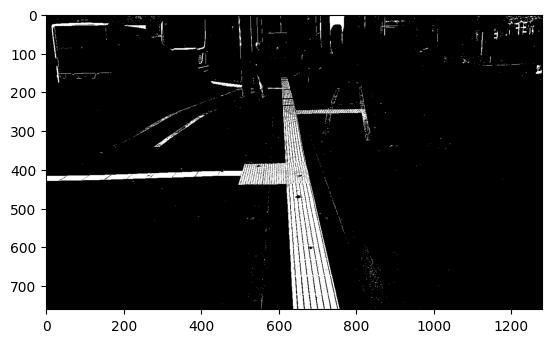

In [4]:
#gauss = cv2.GaussianBlur(img, None, 2)
#plt.imshow(gauss)
#plt.hist(img.flatten(), bins=255)
t, seg = cv2.threshold(img,200,1,cv2.THRESH_BINARY)
plt.imshow(seg)


(760, 1280)

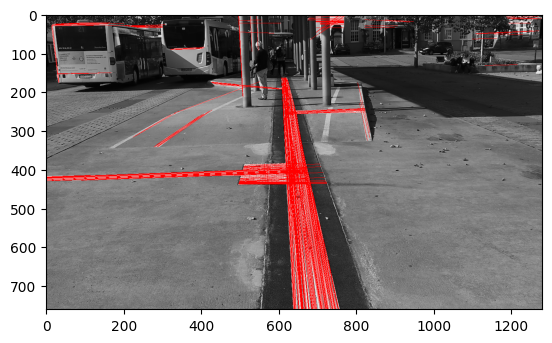

In [5]:
linesh = cv2.HoughLinesP(seg, 1, np.pi/180, 60,
                        minLineLength=50, maxLineGap=50)

lines=np.squeeze(linesh)
img_rgb = cv2.merge((img, img, img))
img_2 = img.copy()
for (x1,y1,x2,y2) in lines:
    cv2.line(img_rgb, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(img_rgb)
img.shape


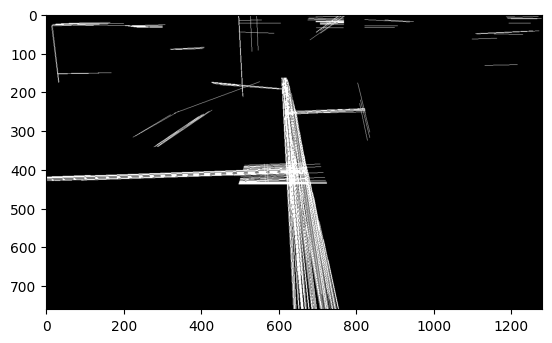

In [6]:
bw = np.zeros(np.shape(img))
for (x1,y1,x2,y2) in lines:
    cv2.line(bw, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(bw)

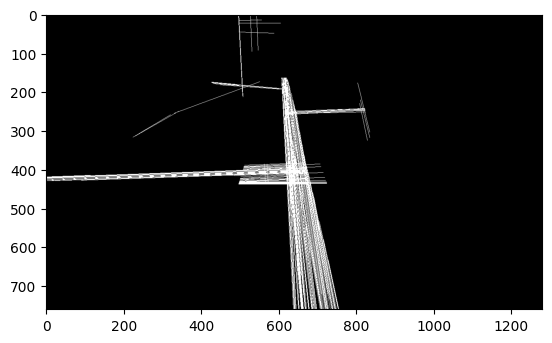

In [7]:
#gauss = cv2.GaussianBlur(bw, None, 2)
#plt.imshow(gauss)
bw = bw.astype("uint8")

nr, labels = cv2.connectedComponents(bw)
plt.imshow(labels == 1)


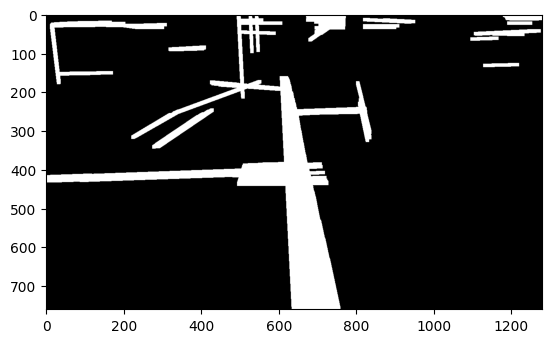

In [8]:
bw_new = cv2.dilate(bw ,np.ones((3,3)), iterations=4)
plt.imshow(bw_new)

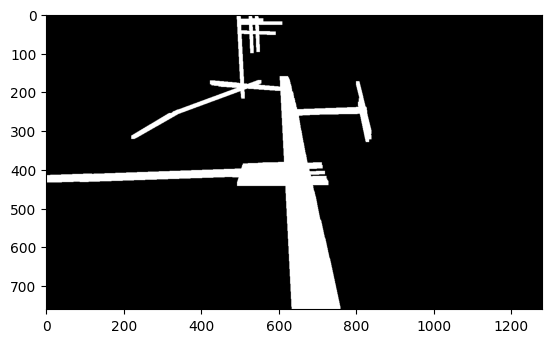

In [9]:
nr, labels = cv2.connectedComponents(bw_new)
bw_connect = (labels==1) * 1
plt.imshow(bw_connect)


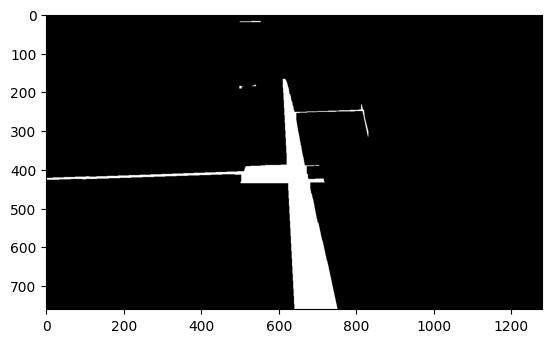

In [10]:
bw_connect_new = cv2.erode(bw_connect.astype('uint8'), np.ones((3,3)), iterations=7)
plt.imshow(bw_connect_new)

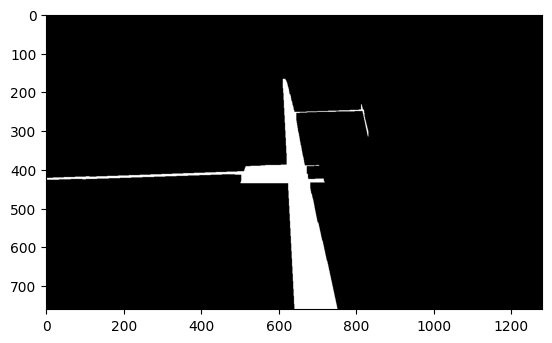

In [11]:
nr, labels = cv2.connectedComponents(bw_connect_new)
bw_final = (labels==2) * 1
plt.imshow(bw_final)


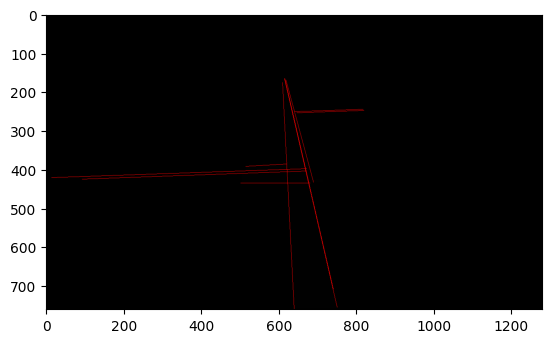

In [12]:
bw_final_c = cv2.Canny(bw_final.astype('uint8'), 0, 0)
plt.imshow(bw_final_c)
linesh = cv2.HoughLinesP(bw_final_c, 1, np.pi/180, 60,
                       minLineLength=100, maxLineGap=1000)

lines=np.squeeze(linesh)
final = cv2.merge((bw_final, bw_final, bw_final))
for (x1,y1,x2,y2) in lines:
    cv2.line(final, (x1,y1), (x2,y2), (255,0,0))
plt.imshow(final)


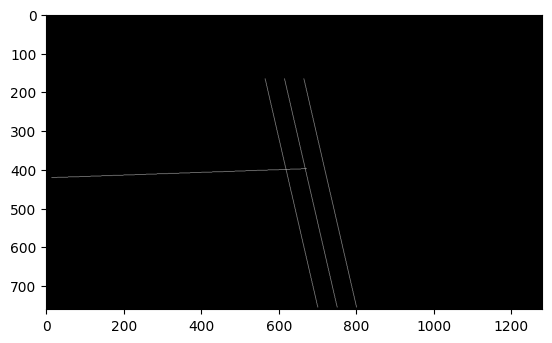

In [13]:
# find the longes line in x and y 
diffx = []
diffy = []
for (x1,y1,x2,y2) in lines:
    diffx.append(x2-x1)
    diffy.append(y2-y1)
diffx.index(max(diffx))
llinex = lines[diffx.index(max(diffx))]
lliney = lines[diffy.index(max(diffy))]
blank = np.zeros(img.shape, dtype=np.uint8)
blank = cv2.line(blank, (llinex[0],llinex[1]), (llinex[2],llinex[3]), (255,255,255))
blank = cv2.line(blank, (lliney[0],lliney[1]), (lliney[2],lliney[3]), (255,255,255))
blank = cv2.line(blank, (lliney[0]-50,lliney[1]), (lliney[2]-50,lliney[3]), (255,255,255))
blank = cv2.line(blank, (lliney[0]+50,lliney[1]), (lliney[2]+50,lliney[3]), (255,255,255))
plt.imshow(blank)


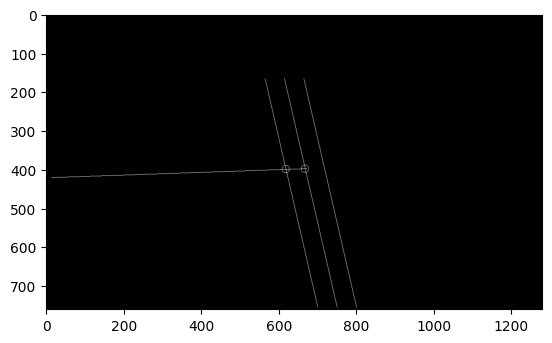

In [14]:
#find intersections from script with offset line 
# so we get two/three intersections left and rigth from the "masterline"
def find_intersection(l1, l2, offset):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]+offset; y3=l2[1]
    x4=l2[2]+offset; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img.shape
px=[]
py=[]
for x in range(-50,50,50):
    p=find_intersection(llinex,lliney,x)
    if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
        px.append(p[0])
        py.append(p[1])

#res = final.copy()
for x in range(len(px)):
    blank = cv2.circle(blank, (px[x].astype('int'), py[x].astype('int')),10, [255,255,255])
plt.imshow(blank)


In [15]:
#line to right or left
if px[0] - px[1] < 0: 
    print("go left")
elif px[0] - px[1] < 0: 
    print("go right")
if len(px) > 2:
    print("you can go left or right") 


go left


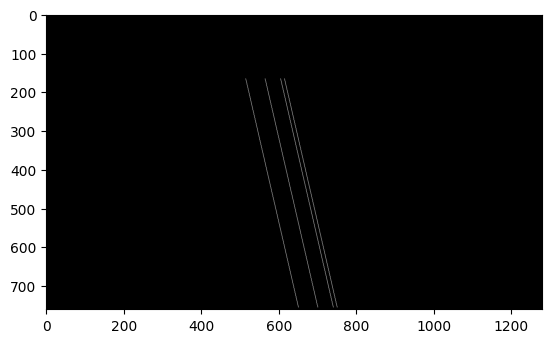

In [16]:
# lines with offset in blank 
blank = np.zeros(img.shape, dtype=np.uint8)
cv2.line(blank, (lliney[0],lliney[1]), (lliney[2],lliney[3]), (255,255,255))
cv2.line(blank, (lliney[0]-10,lliney[1]), (lliney[2]-10,lliney[3]), (255,255,255))
cv2.line(blank, (lliney[0]-50,lliney[1]), (lliney[2]-50,lliney[3]), (255,255,255))
cv2.line(blank, (lliney[0]-100,lliney[1]), (lliney[2]-100,lliney[3]), (255,255,255))
plt.imshow(blank)
# find all points of the line
points = cv2.findNonZero(blank)

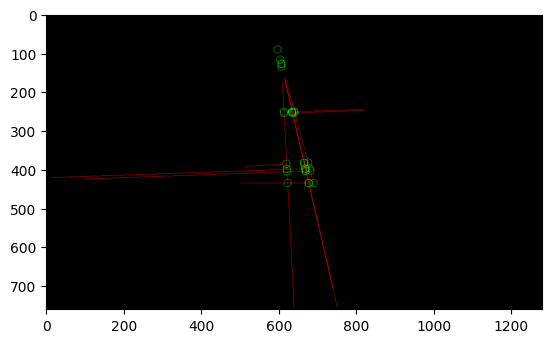

In [17]:
#find intersections from script
def find_intersection(l1, l2):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]; y3=l2[1]
    x4=l2[2]; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img.shape
px=[]
py=[]
for i in range(len(lines)):
    for j in range(i,len(lines)):
        p=find_intersection(lines[i], lines[j])
        if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
            px.append(p[0])
            py.append(p[1])

res = final.copy()
for x in range(len(px)):
    res = cv2.circle(res.astype('uint8'), (px[x].astype('int'), py[x].astype('int')),10, [0,255,0])
plt.imshow(res)
